In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# setting plots theme
sns.set_theme(style="ticks")

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

# How are in-demand skills trending for Data Analysts?
### Mythology
1. Aggregate skills counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand


In [2]:
# Filtering data for data analysts only
df_DA = df[df["job_title_short"].isin(["Data Analyst"])].copy()

In [3]:
# Adding job posting month columns 
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

In [4]:
# exploding data based on "job_skills"
df_DA = df_DA.explode(column="job_skills")

In [5]:
df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


In [6]:
# applying pivot table on "job_posted_month_no" as index, and job_skills as columns and method is size/count
df_DA_pv = df_DA.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

In [7]:
# adding a row and placing total count of each skills in it
df_DA_pv.loc["total"] = df_DA_pv.sum()

In [8]:
# Sorting values by total
df_DA_pv = df_DA_pv.sort_values(by="total", axis=1, ascending=False)

In [9]:
# dropping total row
df_DA_pv.drop(labels="total", axis=0, inplace=True)

In [10]:
DA_totals = df_DA["job_posted_month_no"].value_counts().sort_index()

In [11]:
# Finding percentage of skills
df_DA_pv_percent = df_DA_pv.div(DA_totals/100, axis=0)

In [12]:
# Selecting only top 5 skills
df_plot = df_DA_pv_percent.iloc[:,:5]

In [13]:
months = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov",12: "Dec"
}
df_plot.index = df_plot.index.map(months)

In [14]:
df_plot

job_skills,sql,excel,python,tableau,power bi
job_posted_month_no,,,,,
Jan,13.858868,9.988263,8.076190,6.841410,5.238642
Feb,13.783953,10.011448,8.240538,6.826933,5.735942
Mar,13.865294,10.000705,8.354774,7.138829,5.596870
Apr,13.813347,10.051391,8.334095,6.905759,5.680426
May,14.074531,10.152295,8.656996,6.902199,5.732335
Jun,13.673734,10.320208,8.486586,6.872927,5.904731
Jul,13.750604,9.861725,8.641754,7.026457,5.992523
Aug,13.595390,9.988135,8.592077,6.984915,5.946346
Sep,13.652812,9.768288,8.454787,6.889382,6.233631


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_579/4245987066.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(12, df_plot.iloc[-1][i], df_plot.iloc[-1].index[i])


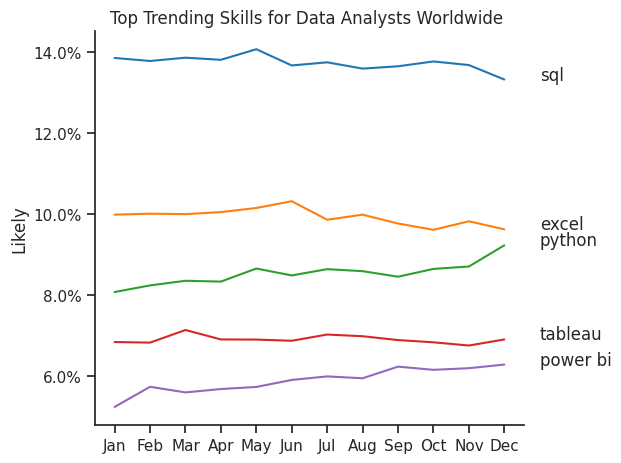

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=df_plot, dashes=False, palette="tab10", ax=ax)
sns.despine()
ax.set_title("Top Trending Skills for Data Analysts Worldwide ")
ax.set_ylabel("Likely")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(lambda x,pos:f"{x}%")
# ax.xaxis.set_major_formatter(lambda x,pos: months[int(x)])
# ax.set_xlim(0,15)
ax.legend().remove()
for i in range(5):
    ax.text(12, df_plot.iloc[-1][i], df_plot.iloc[-1].index[i])
fig.tight_layout()
plt.show()